In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No Null values are present in the dataset.

In [7]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
#Encoding all the fields as all fields are string values.
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

cols=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

for i in cols:
    df[i]= en.fit_transform(df[i])

In [9]:
 df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Modelling

In [25]:
#splitting the dataset into X and y
X=df.drop('class',axis=1)
y=df['class']

In [26]:
#importing train_test_split and creating train and test datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [28]:
#creating the empty list to display the accuracy and f1 score after running all models
models=['RandomForest','LogisticRegression','DecisionTree','SVC','KNN','BernoulliNB','GaussianNB']
model_test_acc=[]
model_test_f1_score = []
model_test_precision_score =[]
model_test_recall_score =[]

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred),3)
test_f1 =  np.round(f1_score(y_test,y_pred,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
#model_test_precision_score(test_prec)
#model_test_recall_score(test_recall)

print("F1 Score on test data using RandomForest tree: ",test_f1)
print("Accuracy Score on test data using RandomForest tree: ",test_acc)
#print("Recall score on  test data using RandomForest tree: ",test_prec)
#print("Precision score on test data using RandomForest tree: ",test_recall)

F1 Score on test data using RandomForest tree:  1.0
Accuracy Score on test data using RandomForest tree:  1.0


In [30]:
test_prec = np.round(recall_score(y_test, y_pred,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred,average='weighted'),3)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)
print("Recall score on  test data using RandomForest tree: ",test_prec)
print("Precision score on test data using RandomForest tree: ",test_recall)

Recall score on  test data using RandomForest tree:  1.0
Precision score on test data using RandomForest tree:  1.0


In [31]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred1),3)
test_f1 =  np.round(f1_score(y_test,y_pred1,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred1,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred1,average='weighted'),3)

model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)


print("F1 Score on test data using LogisticRegression: ",test_f1)
print("Accuracy Score on test data using LogisticRegression: ",test_acc)
print("Recall score on  test data using LogisticRegression : ",test_prec)
print("Precision score on test data using LogisticRegression : ",test_recall)

F1 Score on test data using LogisticRegression:  0.948
Accuracy Score on test data using LogisticRegression:  0.948
Recall score on  test data using LogisticRegression :  0.948
Precision score on test data using LogisticRegression :  0.948


In [32]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred2),3)
test_f1 =  np.round(f1_score(y_test,y_pred2,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred2,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred2,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using DecisionTree: ",test_f1)
print("Accuracy Score on test data using DecisionTree: ",test_acc)
print("Recall score on  test data using DecisionTree : ",test_prec)
print("Precision score on test data using DecisionTree : ",test_recall)

F1 Score on test data using DecisionTree:  1.0
Accuracy Score on test data using DecisionTree:  1.0
Recall score on  test data using DecisionTree :  1.0
Precision score on test data using DecisionTree :  1.0


In [33]:
svm= SVC()
svm.fit(X_train,y_train)
y_pred3 = svm.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred3),3)
test_f1 =  np.round(f1_score(y_test,y_pred3,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred3,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred3,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using SVM: ",test_f1)
print("Accuracy Score on test data using SVM: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using SVM:  0.993
Accuracy Score on test data using SVM:  0.993
Recall score on  test data using SVM :  0.993
Precision score on test data using SVM :  0.993


In [34]:
accuracy = []
neighbors = np.arange(1,12)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred4 = classifier.predict(X_test)
    acc = accuracy_score(y_pred4,y_test)
    accuracy.append(acc)

In [35]:
accuracy

[0.9993846153846154,
 0.9993846153846154,
 0.9981538461538462,
 0.9963076923076923,
 0.9963076923076923,
 0.9969230769230769,
 0.9956923076923077,
 0.9950769230769231,
 0.9950769230769231,
 0.9950769230769231,
 0.9956923076923077]

<AxesSubplot:>

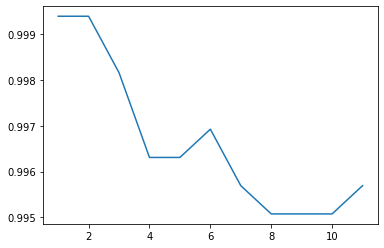

In [36]:
sns.lineplot(x=neighbors,y=accuracy)

In [37]:
#Since accuracy score is good for 2, we can select 2 as k

classifier = KNeighborsClassifier(n_neighbors=2, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred5 = classifier.predict(X_test)
test_acc =  np.round(accuracy_score(y_test,y_pred5),3)
test_f1 =  np.round(f1_score(y_test,y_pred5,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_pred5,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_pred5,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using KNN:  0.999
Accuracy Score on test data using KNN:  0.999
Recall score on  test data using SVM :  0.999
Precision score on test data using SVM :  0.999


In [38]:
 # Applying Bernoulli Naive Bayes Classifier
    
from sklearn.naive_bayes import BernoulliNB
classifier= BernoulliNB()
classifier.fit(X_train, y_train)
y_predd= classifier.predict(X_test)

test_acc =  np.round(accuracy_score(y_test,y_predd),3)
test_f1 =  np.round(f1_score(y_test,y_predd,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_predd,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_predd,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using KNN:  0.84
Accuracy Score on test data using KNN:  0.842
Recall score on  test data using SVM :  0.842
Precision score on test data using SVM :  0.856


In [39]:
classifier1= GaussianNB()
classifier1.fit(X_train, y_train)
y_predg= classifier.predict(X_test)

test_acc =  np.round(accuracy_score(y_test,y_predg),3)
test_f1 =  np.round(f1_score(y_test,y_predg,average='weighted'),3)
test_prec = np.round(recall_score(y_test, y_predg,average='weighted'),3)
test_recall = np.round(precision_score(y_test, y_predg,average='weighted'),3)


model_test_f1_score.append(test_f1)
model_test_acc.append(test_acc)
model_test_precision_score.append(test_prec)
model_test_recall_score.append(test_recall)

print("F1 Score on test data using KNN: ",test_f1)
print("Accuracy Score on test data using KNN: ",test_acc)
print("Recall score on  test data using SVM : ",test_prec)
print("Precision score on test data using SVM : ",test_recall)

F1 Score on test data using KNN:  0.84
Accuracy Score on test data using KNN:  0.842
Recall score on  test data using SVM :  0.842
Precision score on test data using SVM :  0.856


In [40]:
#displaying the accuracy and f1 score of each models
model_performance = pd.DataFrame({
    'model':models,
    'f1_score':model_test_f1_score,
    'accuracy':model_test_acc,
    'Recall_score':model_test_precision_score,
    'Precision_score':model_test_recall_score,
})
model_performance

,model,f1_score,accuracy,Recall_score,Precision_score
0,RandomForest,1.000,1.000,1.000,1.000
1,LogisticRegression,0.948,0.948,0.948,0.948
2,DecisionTree,1.000,1.000,1.000,1.000
3,SVC,0.993,0.993,0.993,0.993
4,KNN,0.999,0.999,0.999,0.999
5,BernoulliNB,0.840,0.842,0.842,0.856
6,GaussianNB,0.840,0.842,0.842,0.856


From the above table its clear that Randomforest and Decision tree model has got very good scores and can be considered as good models